<a href="https://colab.research.google.com/github/IggyZhao/Python-Skills-by-Iggy/blob/master/%E2%80%9CData_Visualization_in_Python_2020_Summer_updated_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Syllabus

*   Tell a story with data and visualization
*   Python visualization framework and the environment setup
*   基础：matplotlib and pandas plot
*   进阶：seaborn
*   作图实例
*   要求：掌握stateful，OOP的作图框架和方法





## Tell a story


*   Engage your audience with hierarchical summarized insights. 
*   Process:

> 1. Organize your initial story and insights.
> 2. Who is your audience? What are they interested in? 
> 3. What's the high-level insights(don't worry about the details at this moment)?
> 4. What's the correlation between your insights?
> 5. How will your insights change your audience's mind or help them make decision? 





## 可视化的基本原则

*  Story focus, supported by visualization
*  Data dimensions in a chart: 2D
*  Preattentive attributes: color, highlight
*  Less is more: remove distraction




## Do & Don't in Visualization


*   Use simple 2D barchart <br>
![alt text](https://www.tutorialspoint.com/r/images/barchart.png)<br>
Do not use 3D barchart <br>
![alt text](https://i.stack.imgur.com/BumCd.png)

*  Use preattentive attibutes: color, highlight<br>
![alt text](https://vrzkj25a871bpq7t1ugcgmn9-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/ggplot-bar-chart-with-highlighted-bar-600x444.png)<br>
Do not highlight too much <br>
![alt text](https://docs.servicenow.com/bundle/geneva-performance-analytics-and-reporting/page/use/basic_reporting/image/BarChart.png) <br>

* Do: less is more<br>
![alt text](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/58dbf1ffbf629a91c22f8324/1490810045071/Declutter+GIF+1.png?format=750w)<br>

Do not include distraction<br>
![alt text](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/58dbf3b82994ca7505dc6920/1490809790004/?format=750w)<br>







In [2]:
#@title Import packages
import numpy as np, pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # 恢复matplotlib默认样式
import seaborn as sns

# plt.style.use('ggplot')
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Python visualization [examples](https://python-graph-gallery.com/)

## Basic: Matplotlib

Stateful vs stateless(OOP) approach

*   Stateful approach
<br>线图点图：plt.plot(x=,y=, color=, marker=,linestyle=,linewidth,markersize=)
<br>bar chart: plt.bar(x, y, align='center', alpha=0.5)
<br>优点：简单快捷
<br>缺点：缺乏灵活性

*   Stateless(OOP) approach：作图的元素

![alt text](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
1. fig, ax = plt.subplots(nrow,ncol,figsize=(5, 3))
<br>fig: 给我一张画布; ax：画布上要有几个图
2. 将ax看成object, 添加plot,legend, set_xlabel, set_ylabel

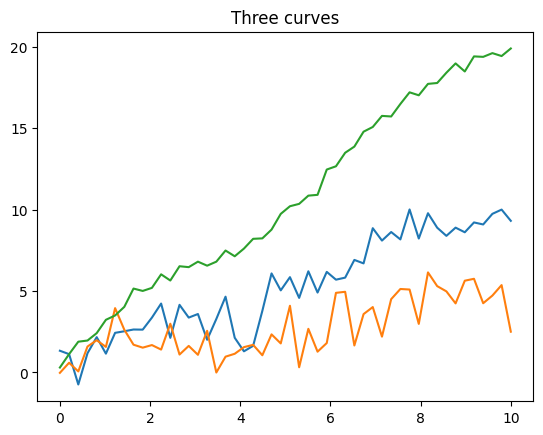

In [6]:
## Comparison between stateful and stateless approach
x=np.linspace(0,10,50)
np.random.seed(10)
# stateful
plt.plot(x,np.sin(x)+x+np.random.randn(50))
plt.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
plt.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.title("Three curves")

plt.show()

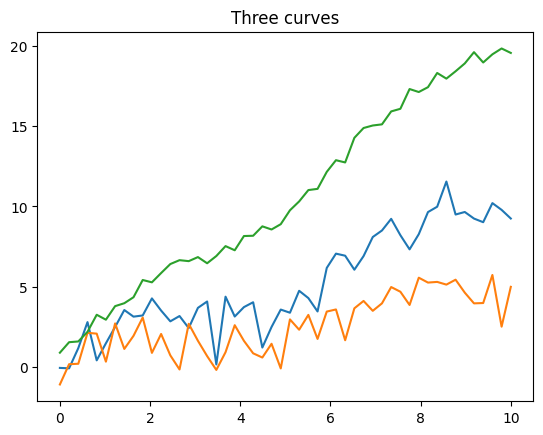

In [7]:
# stateless
fig,ax0=plt.subplots(nrows=1) # Create a figure and a set of subplots.if multiple plots, return an array to ax. 
ax0.plot(x,np.sin(x)+x+np.random.randn(50)) # randn: return standard normal distribution
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves")
plt.show()

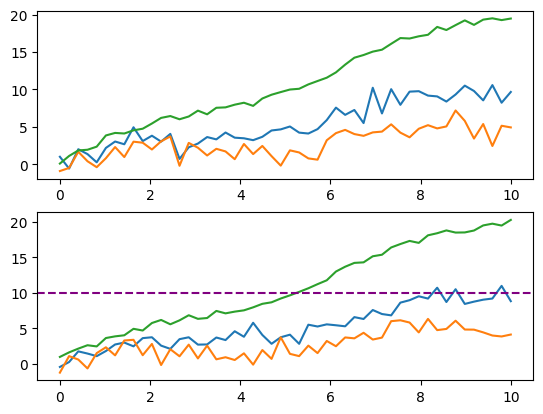

"\nAnother example for multiple subplots and shared axes\nfig,axes = plt.subplots(nrows=2,ncols=2,sharex=True,shared=True)\naxes[0,0].set(title='Upper Left')\naxes[0,1].set(title='Upper Right')\naxes[1,0].set(title='Lower Left')\naxes[1,1].set(title='Lower Right')\nplt.show()\n"

In [8]:
## Plot multiple charts on the same figure: stateless only
fig=plt.figure() # crate a new figure
ax0=fig.add_subplot(211) # figure layout: 2x1. We will plot the first chart on [0,0]
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))

ax1=fig.add_subplot(212)
ax1.plot(x,np.sin(x)+x+np.random.randn(50))
ax1.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax1.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.axhline(y=10,color='purple',linestyle='--')

plt.show()
'''
Another example for multiple subplots and shared axes
fig,axes = plt.subplots(nrows=2,ncols=2,sharex=True,shared=True)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')
plt.show()
'''


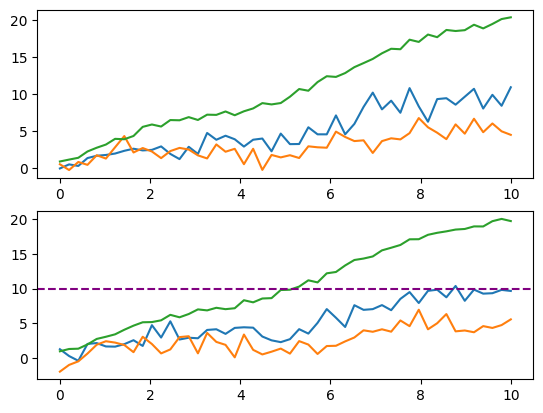

In [9]:
## Plot multiple charts on the same figure
# 混合用：stateful and stateless
fig=plt.figure()
plt.subplot(211) # two rows and one column, [0,0]
plt.plot(x,np.sin(x)+x+np.random.randn(50))
plt.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
plt.plot(x,np.sin(x)+2*x+np.random.rand(50))

ax0=fig.add_subplot(212) # two rows and one column, [1,0]
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.axhline(y=10,color='purple',linestyle='--') # 可以放其他数值，比如平均数，中位数之类的。

plt.show()


### 调节coordinate objects


*   adjust background color
*   adjust gridline
*   set x-axis label and y-axis label
*   adjust x-axis and y-axis ticks


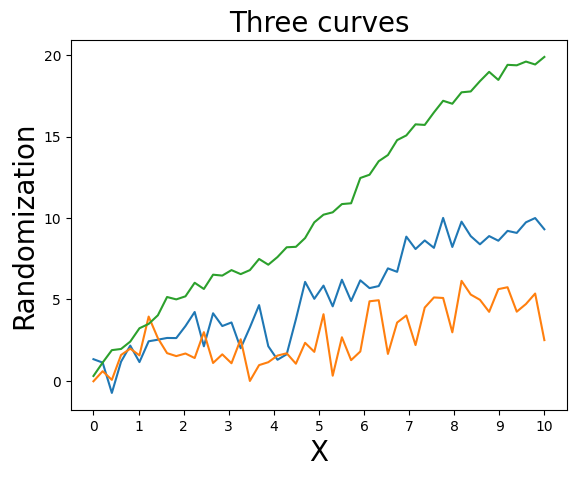

In [10]:
x=np.linspace(0,10,50)
np.random.seed(10)
fig,ax0=plt.subplots(nrows=1)
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves",fontsize=20)

# 1. adjust gridline type: dotted-line
ax0.grid(color='gray', alpha=0.5, linestyle='dotted') # alpha to adjust grid transparency
# or hide the grid: 
ax0.grid(False)
# 2. set x-axis label and y-axis label
ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
# # 3. adjust x-axis and y-axis data range
ax0.set_xticks(np.arange(min(x),max(x)+1,1))

plt.show() # used to suppress 


In [12]:
## 用for loop to subplot
x=np.linspace(0,10)
np.random.seed(10)
# 生成数据
y1=np.sin(x)+x+np.random.randn(50)
y2=np.sin(x)+0.5*x+np.random.randn(50)
y3=np.sin(x)+2*x+np.random.randn(50)

df=pd.DataFrame({'serie1':y1,'serie2':y2,'serie3':y3})

fig=plt.figure()
fig.subplots_adjust(hspace=0.4)

i=1
for col in df.columns:
  plt.subplot(df.shape[1],1,i) 
  plt.plot(df.loc[:,col])
  plt.title(col,y=0.6,loc='right')
  i+=1
  
fig.show()

### Visualization case with Matplotlib
dataset: dummy UK user bank [account](http://www.superdatascience.com/wp-content/uploads/2015/06/UK-Bank-Customers.csv)
Balance sliced by 

*   Gender
*   Region
*   Job Classification
*   Gender + Region
*   Age group + Gender



In [32]:
# Import data using Pandas. csv file is in a Google Drive
file_id='13WIX0uQaA4ROvsfVjqPUwbmyW07XMc9S'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df = pd.read_csv(csv_url)
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [33]:
# Data preprocessing:  rename columns, create age group
df.columns=['cust_id','first_name','last_name','gender','age','region','job','date_join',
           'balance']
df['age_group'] = pd.cut(df['age'], bins=[15, 30, 50, float('Inf')], labels=['15-30', '30-50', 'Above 50'])


In [30]:
df.head()

,A,B,C,D
2000-01-01,-0.982063,-0.250461,-0.319671,0.322393
2000-01-02,-0.514151,2.073588,-1.143624,0.020273
2000-01-03,0.721782,3.264282,-1.893520,0.835495
2000-01-04,0.358901,3.907511,-1.237456,2.573581
2000-01-05,-1.163945,3.129107,-0.657823,1.513246


In [16]:
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal
dt_region_mean_bal = dt_region_mean_bal.reset_index()
dt_region_mean_bal

,region,balance
0,England,39292.911996
1,Northern Ireland,39505.053981
2,Scotland,39511.326263
3,Wales,42390.056269


In [22]:
# Balance vs region: Barchart
dt_region_mean_bal= df.groupby(['region'])['balance'].mean()
dt_region_mean_bal = dt_region_mean_bal.reset_index() # why reset index?
dt_region_mean_bal['balance']=np.rint(dt_region_mean_bal['balance'])
dt_region_mean_bal


,region,balance
0,England,39293.0
1,Northern Ireland,39505.0
2,Scotland,39511.0
3,Wales,42390.0


In [20]:
# what if we didn't reset index
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal

region
England             39292.911996
Northern Ireland    39505.053981
Scotland            39511.326263
Wales               42390.056269
Name: balance, dtype: float64

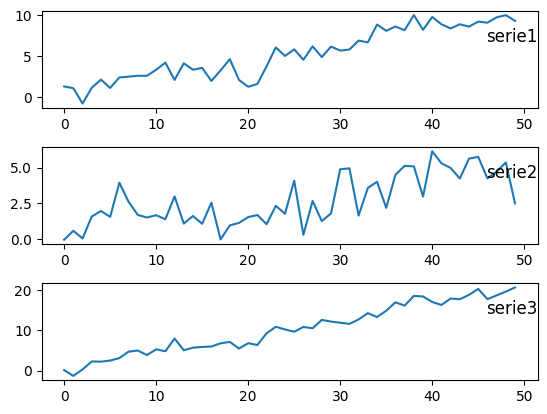

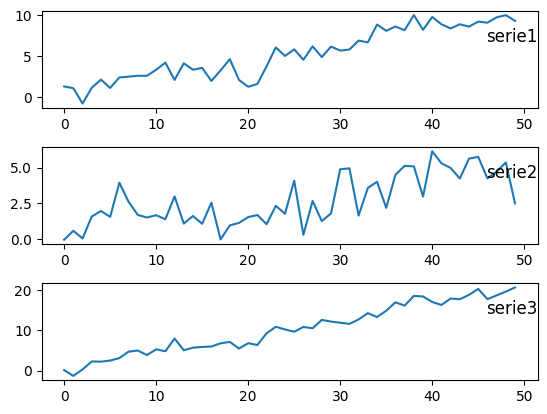

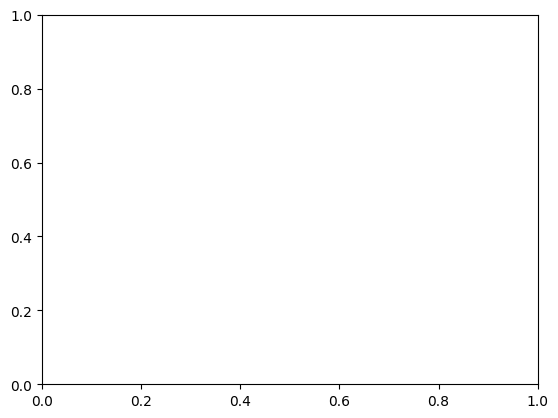

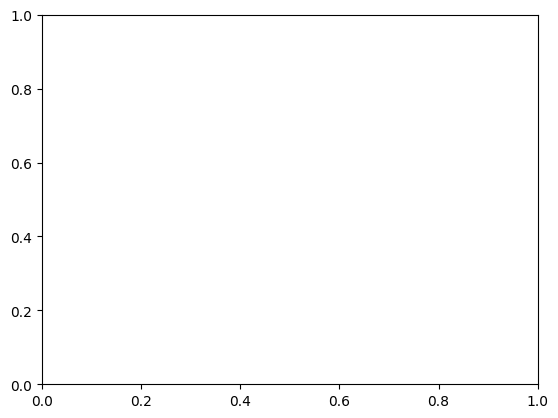

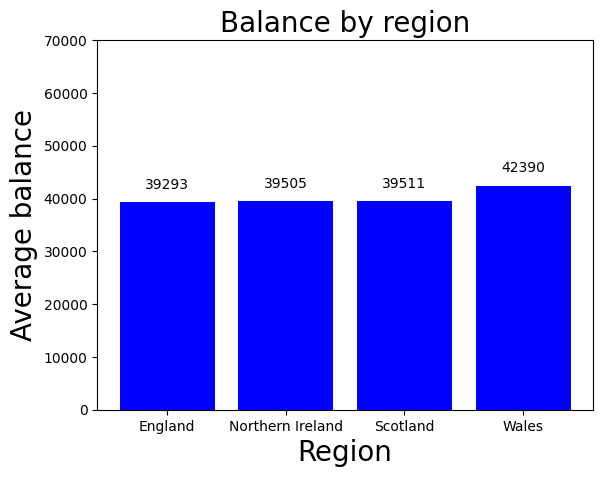

In [23]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'])
# adjust: xlabel, ylabel,y-axis scale; adjust background color
# add title
ax0.set_title("Balance by region",fontsize=20)
ax0.set_xlabel('Region')
ax0.set_ylabel('Average balance')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
ax0.set_ylim(top=70000)
ax0.grid(False)

# what about data label?
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax0.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom') #ha=horizontal alignment

rect1=ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'],color='blue')
autolabel(rect1)
plt.show()

In [24]:
# Balance vs (Region + Gender): Bar chart with multiple X
dt_rg_mean=df.groupby(['region','gender'])['balance'].mean()
dt_rg_mean=dt_rg_mean.reset_index()
dt_rg_mean['balance']=np.rint(dt_rg_mean['balance'])
dt_rg_mean

,region,gender,balance
0,England,Female,39989.0
1,England,Male,38582.0
2,Northern Ireland,Female,38769.0
3,Northern Ireland,Male,41644.0
4,Scotland,Female,37306.0
5,Scotland,Male,40385.0
6,Wales,Female,40312.0
7,Wales,Male,44852.0


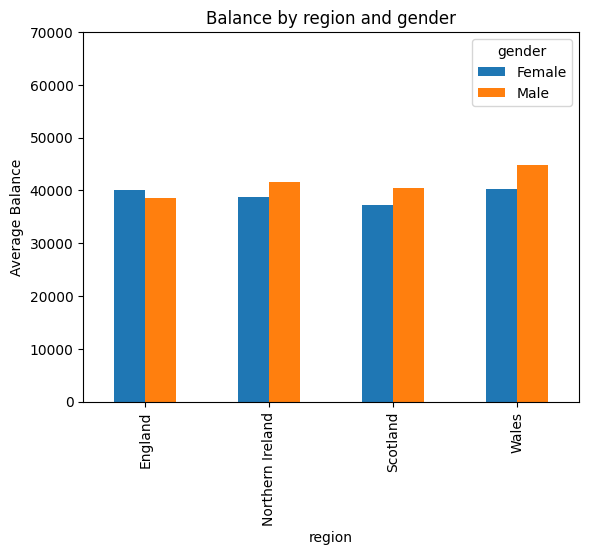

In [25]:
# use OOP + pandas plot
fig,ax1=plt.subplots(nrows=1)
df.groupby(['region','gender'])['balance'].mean().unstack().plot(kind='bar',ax=ax1)
ax1.set_ylim(top=70000)
ax1.set_title("Balance by region and gender")
ax1.set_ylabel('Average Balance')
ax1.grid(False)
plt.show()

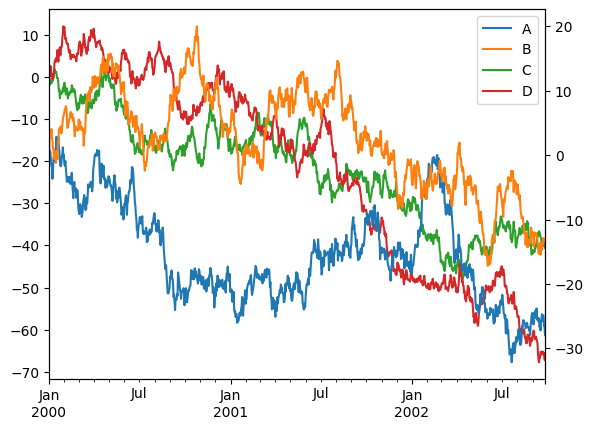

In [26]:
# two y-axies: example, plot conversions and conversion rate on the same chart.
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(secondary_y=['A', 'B'], mark_right=False)
plt.show()

## Seaborn
基于Matplotlib的高级作图工具，特别适合做统计分析。
基本思路: <br>

*   用Seaborn作图
*   用Matplotlib微调
*   (Optional) Theme








In [27]:
# Prepare the data
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_iris=pd.read_csv(url) # a dataframes
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


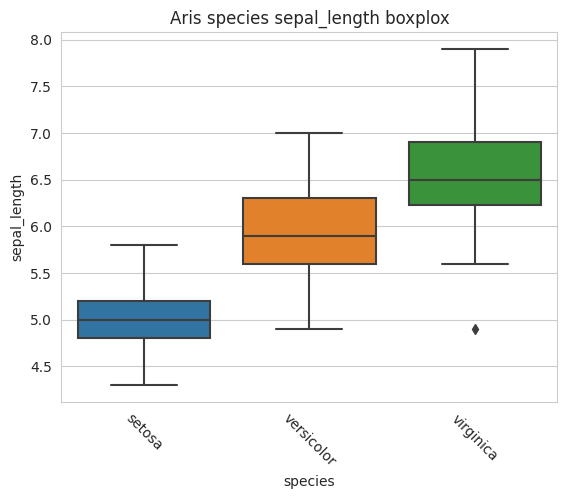

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
#stateful
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title
plt.show()

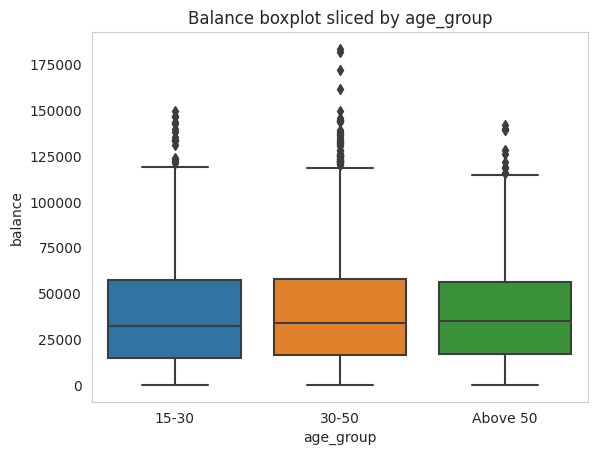

In [43]:
# boxplot UK bank client balance by age group, using seaborn and matplotlib
# stateless(OOP)
fig,ax2=plt.subplots(nrows=1)
sns.boxplot(x='age_group',y='balance',data=df,ax=ax2) # connect sns and matplotlib
ax2.grid(False)
ax2.set_title("Balance boxplot sliced by age_group")
plt.show()

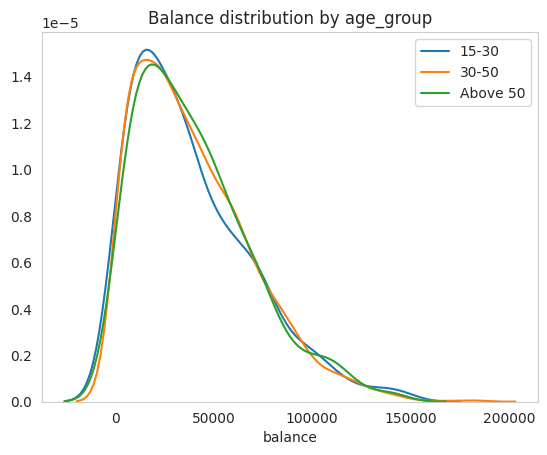

In [44]:
# Balance distribution by difference groups
# stateless(OOP)
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1)

sns.distplot(df.loc[df['age_group']=='15-30','balance'],label='15-30', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='30-50','balance'],label='30-50', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='Above 50','balance'],label='Above 50', hist=False,ax=ax3)

ax3.grid(False)
ax3.set_title("Balance distribution by age_group")
ax3.legend()
plt.show()


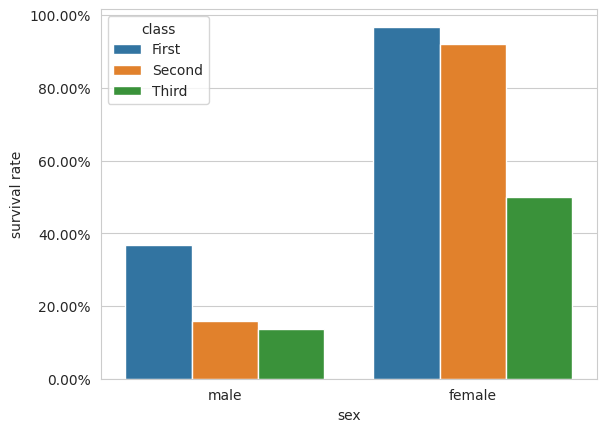

In [54]:
# barplot: return as object
df_titanic=sns.load_dataset('titanic')
g=sns.barplot(x="sex", y="survived", hue="class", ci=None,data=df_titanic)
g.set_ylabel('survival rate')
vals=g.get_yticks()
g.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()


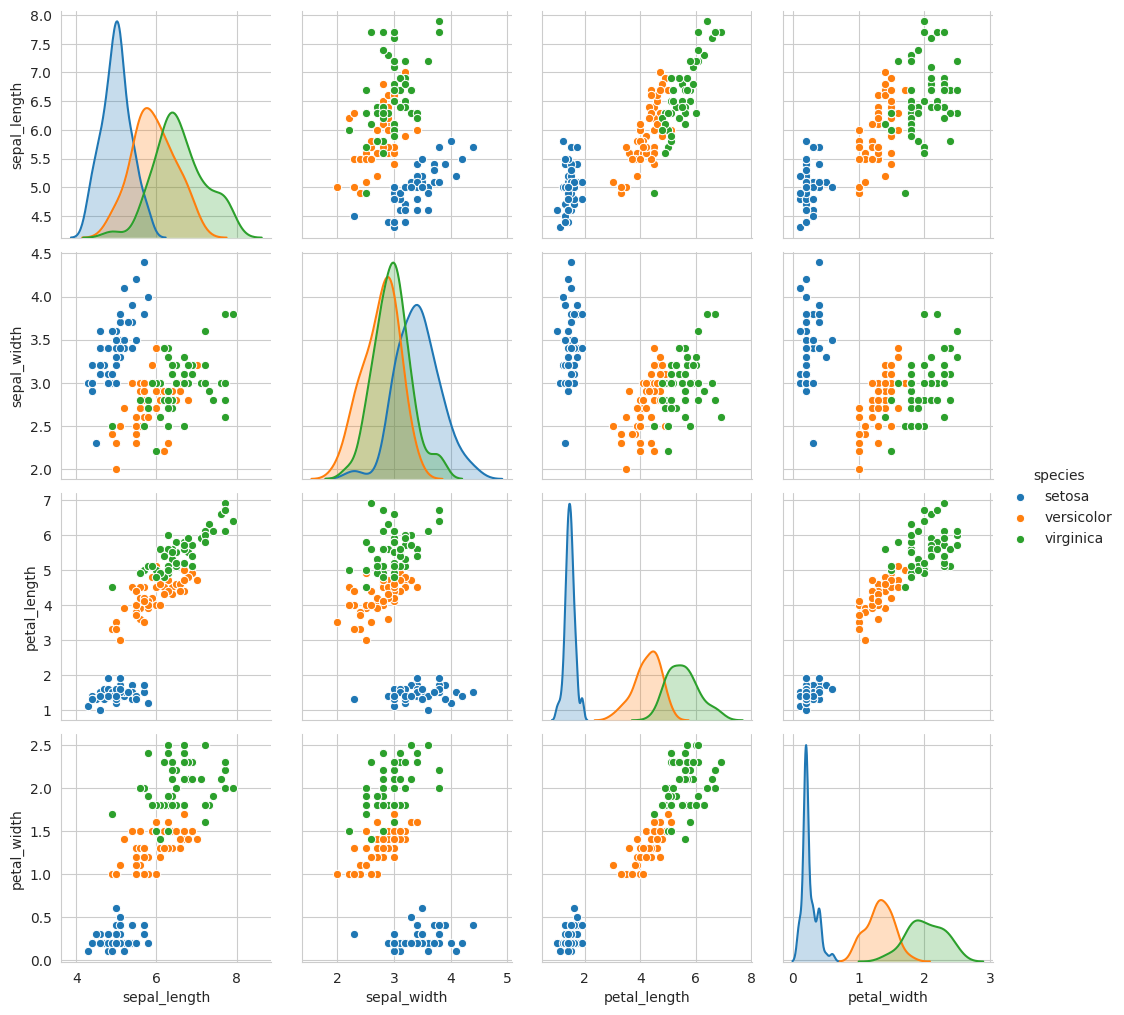

In [55]:
# Scatterplot
sns.pairplot(data=df_iris, hue="species") # feature correlation 
plt.show()

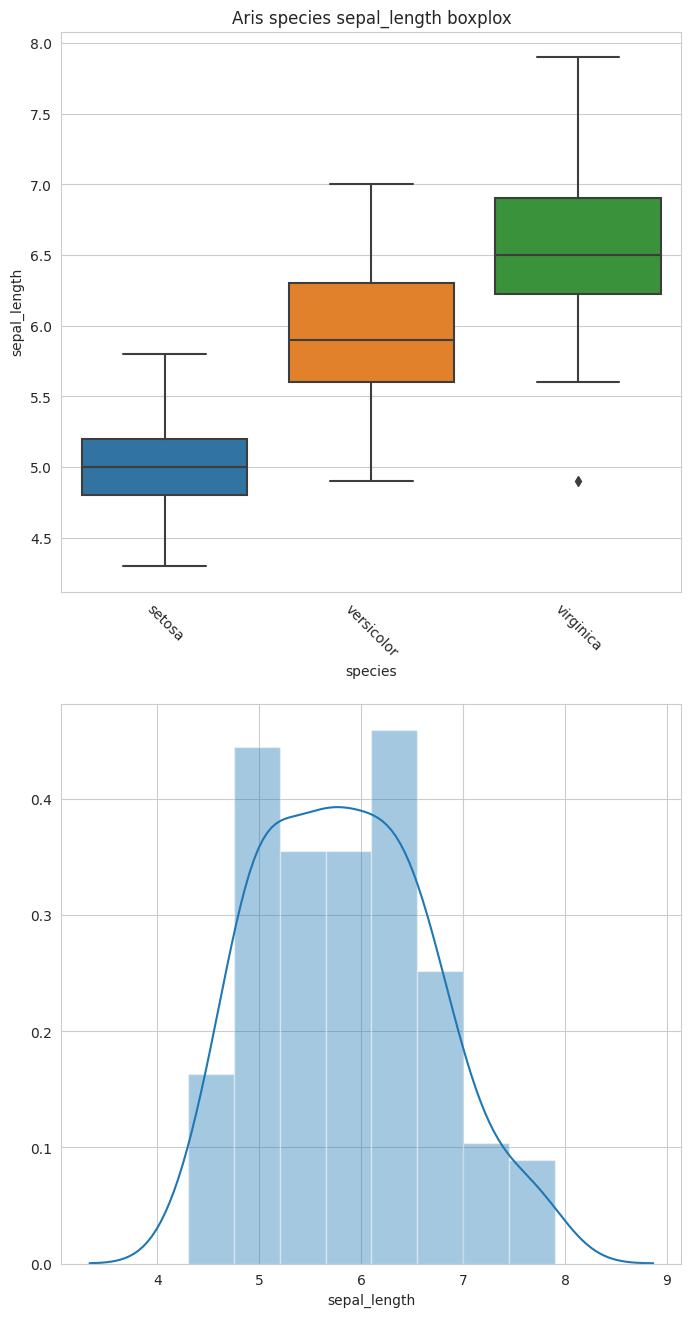

In [61]:
# multiple charts and chart overlap
# stateful
fig=plt.figure(figsize=(8,16)) # X: control width, Y: control length
plt.subplot(2,1,1) # or ax0=fig.add_subplot(2,1,1)
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title

plt.subplot(2,1,2)
sns.distplot(df_iris['sepal_length'])

plt.show()


In [62]:
# How to make factorplot: two factors
file_id='1RYrPCY2gRmyEeMDJnLy5aEGfgio8Siel'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df_factor = pd.read_csv(csv_url)
df_factor=df_factor.iloc[:,[1,2,3,4,5]]
df_factor.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


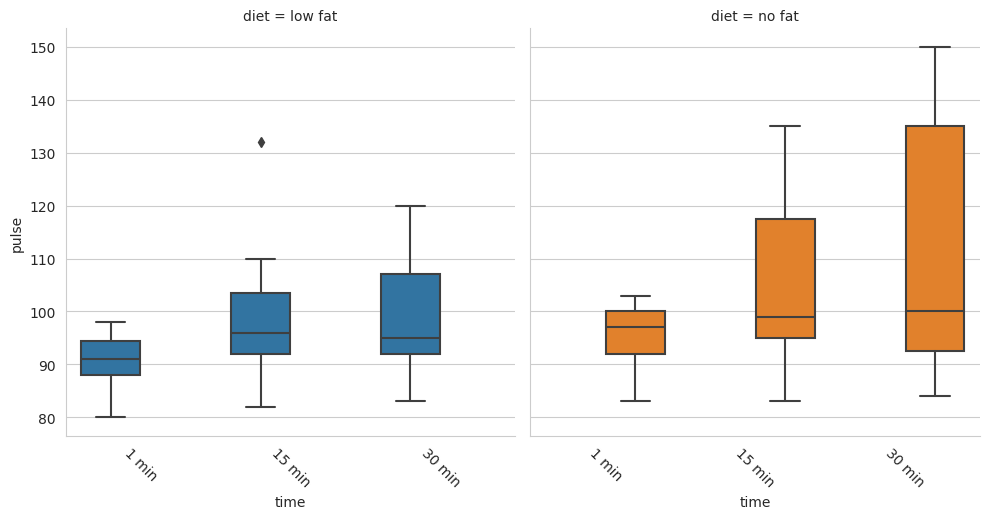

In [71]:
# g is a sns object
g=sns.factorplot(x='time', 
                   y='pulse', 
                   data=df_factor, 
                   hue='diet',  # Color by diet
                   col='diet',  # Separate by diet
                   kind='box') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
plt.show()


In [69]:
# regression plot
# Simulate data:
x = np.linspace(1,50,num=100)
epsilon = np.random.normal(0,3,size=100)
dt_lin = pd.DataFrame({'x':x, 'y':0.2+0.2*x + epsilon})


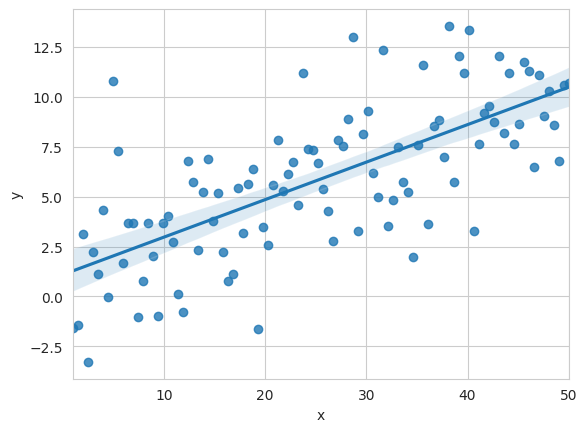

In [70]:
sns.set_style('whitegrid')
sns.regplot(x='x',y='y',data=dt_lin)

plt.show()

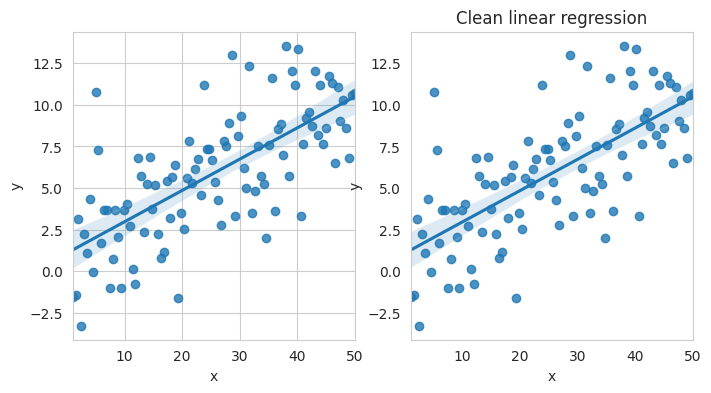

In [73]:
# 微调， 把图形做得更简洁, 把不喜欢的gridline去掉, 加上title
fig=plt.figure(figsize=(8,4))
ax0=fig.add_subplot(121)
sns.regplot(x='x',y='y',data=dt_lin,ax=ax0)

ax1=fig.add_subplot(122)
sns.regplot(x='x',y='y',data=dt_lin,ax=ax1)
ax1.grid(False)
ax1.set_title('Clean linear regression')

plt.show()

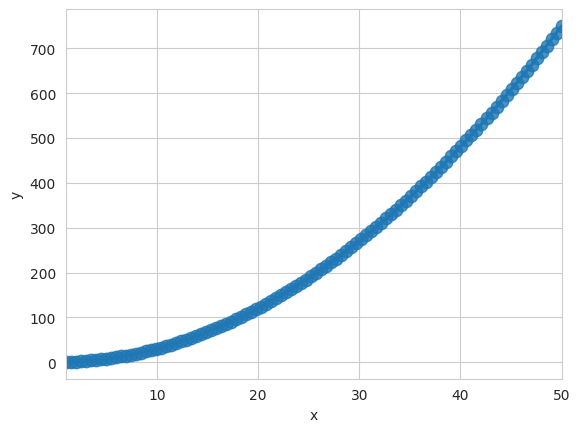

In [74]:
# seaborn fit a polynomial model
x = np.linspace(1,50, num = 100)
dt_poly=pd.DataFrame({'x':x,'y':0.2+0.3*np.power(x,2)})
sns.regplot(x='x', y='y',data=dt_poly,order=2, ci=None, scatter_kws={"s": 80});
plt.show()

## Other packages

### Plotly: Sankey chart as example


In [75]:
!pip install chart_studio
!pip install plotly --upgrade

import plotly
import chart_studio.plotly as py


     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 12.9MB 307kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [85]:
# Use British Bank data as example: 
dt_region_job_nums = df.groupby(['region','job'])['cust_id'].count().reset_index()
nodes=list(set(dt_region_job_nums['region'].values.tolist() + dt_region_job_nums['job'].values.tolist()))
dt_region_job_nums['indice_region'] = dt_region_job_nums['region'].apply(lambda x: nodes.index(x))
dt_region_job_nums['indice_job'] = dt_region_job_nums['job'].apply(lambda x: nodes.index(x))
dt_region_job_nums

,region,job,cust_id,indice_region,indice_job
0,England,Blue Collar,344,2,0
1,England,Other,314,2,6
2,England,White Collar,1501,2,5
3,Northern Ireland,Blue Collar,41,1,0
4,Northern Ireland,Other,105,1,6
5,Northern Ireland,White Collar,65,1,5
6,Scotland,Blue Collar,544,3,0
7,Scotland,Other,496,3,6
8,Scotland,White Collar,84,3,5
9,Wales,Blue Collar,120,4,0


In [78]:
nodes

['Blue Collar',
 'Northern Ireland',
 'England',
 'Scotland',
 'Wales',
 'White Collar',
 'Other']

In [86]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = nodes,
      color = "blue"
    ),
    link = dict(
      source = dt_region_job_nums['indice_region'], # indices correspond to labels
      target = dt_region_job_nums['indice_job'], # indices correspond to labels
      value = dt_region_job_nums['cust_id']
  ))])

fig.update_layout(title_text="Customer region and job sankey chart", font_size=10)
fig.show()

## Global Sales Data Follow-up
* Background review:
  - US sales and profit grow YoY but profit rate declines
  - US central region has negative ROI
  - A discount guardrail is needed to ensure ROI positive
* Next step


In [87]:
sales_file_id='1Pequ6-T7hqFzm7O5R9fNGDNtY9V2Ecog'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
sales_csv_url=link.format(FILE_ID=sales_file_id)
df_sales = pd.read_csv(sales_csv_url)


In [88]:
df_sales.head()

,order_date,ship_mode,segment,city,state,country,region,market,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,11/11/2014,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,62.15,40.77,High
1,2/5/2014,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-288.77,923.63,Critical
2,10/17/2014,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,919.97,915.49,Medium
3,1/28/2014,First Class,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-96.54,910.16,Medium
4,11/5/2014,Same Day,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,311.52,903.04,Critical


In [89]:
'''
Data preprocessing
- Remove dollar sign, comma from the sales and profit
- convert sales,profit field value type from string to float

'''
df_sales.sales = df_sales.sales.str.replace('$','')
df_sales.sales = df_sales.sales.str.replace(',','')
df_sales.sales = df_sales.sales.astype(float)
df_sales.profit = df_sales.profit.str.replace(',','')
df_sales.profit = df_sales.profit.astype(float)

In [90]:
df_sales.head(3)

,order_date,ship_mode,segment,city,state,country,region,market,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,11/11/2014,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,2/5/2014,Second Class,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,10/17/2014,First Class,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium


In [93]:
# Problem: why Central US has stats sig lower profit rate than other regions
df_sales_us_agg=df_sales.loc[df_sales.country=='United States',].groupby(['region'])['sales','profit'].sum().reset_index()
df_sales_us_agg['profit_rate']=df_sales_us_agg.profit/df_sales_us_agg.sales
df_sales_us_agg

,region,sales,profit,profit_rate
0,Central US,501239.88,39706.44,0.079216
1,Eastern US,678781.36,91522.81,0.134834
2,Southern US,391721.90,46749.69,0.119344
3,Western US,725457.93,108418.74,0.149449


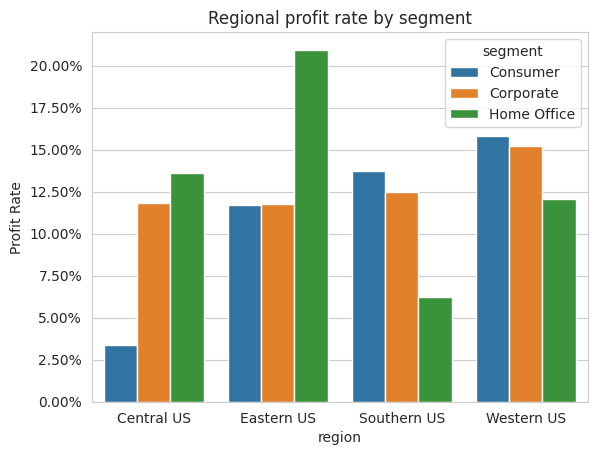

In [105]:
# Next question: deep-dive why central US has lowest profit rate using visualization
'''
breakout and viz p_rate by segment, category
findings: consumer segment profit rate in central US is much lower than other.  
'''
df_us=df_sales.loc[df_sales.country=='United States']
#df_us.head()
df_us_region=df_us.groupby(['region','segment'])['sales','profit'].sum().reset_index()
df_us_region['profit_rate']=df_us_region['profit']/df_us_region['sales']
# df_us_region

g_region=sns.barplot(x='region',y='profit_rate',hue='segment',ci=None, data=df_us_region)
g_region.set_title('Regional profit rate by segment')
g_region.set_ylabel('Profit Rate')
vals=g_region.get_yticks()
g_region.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()



In [108]:
'''
within the Consumer segment, central vs the other 3
1. category
'''
# two groups: central vs other
df_us_segment=df_us.loc[df_sales.segment=='Consumer',]
df_us_segment.head()

,order_date,ship_mode,segment,city,state,country,region,market,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,11/11/2014,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
8,11/11/2014,First Class,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,3/6/2012,First Class,Consumer,Seattle,Washington,United States,Western US,USCA,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High
10,3/6/2012,First Class,Consumer,Seattle,Washington,United States,Western US,USCA,OFF-AR-5309,Office Supplies,Art,Newell 330,17.94,3,0.0,4.66,4.29,High
16,2/19/2012,Standard Class,Consumer,Arlington,Texas,United States,Central US,USCA,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low


In [110]:
df_us_segment['region_label']=df_us_segment['region'].apply(lambda x:'Central US' if x=='Central US' else 'Other Region')
df_us_segment_agg=df_us_segment.groupby(['region_label','category'])['sales','profit'].sum().reset_index()
df_us_segment_agg['profit_rate']=df_us_segment_agg['profit']/df_us_segment_agg['sales']
df_us_segment_agg


,region_label,category,sales,profit,profit_rate
0,Central US,Furniture,86217.59,-3989.79,-0.046276
1,Central US,Office Supplies,93123.09,2578.42,0.027688
2,Central US,Technology,72690.75,9975.41,0.137231
3,Other Region,Furniture,304557.50,10879.37,0.035722
4,Other Region,Office Supplies,271103.21,53853.17,0.198645
5,Other Region,Technology,333709.20,60822.70,0.182263


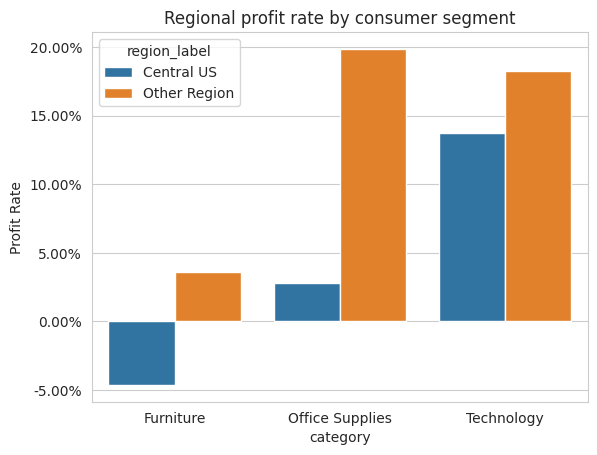

In [118]:
fig=plt.figure() # crate a new figure
ax0=fig.add_subplot(111)
g_region1=sns.barplot(x='category',y='profit_rate',hue='region_label',ci=None, data=df_us_segment_agg,ax=ax0)
g_region1.set_title('Regional profit rate by consumer segment')
g_region1.set_ylabel('Profit Rate')
vals=g_region1.get_yticks()
g_region1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()
